# Building a Neural Network with PyTorch on the MNIST Dataset

The MNIST dataset contains 28×28 grayscale images of handwritten digits (0-9). We will build a simple neural network using PyTorch to classify these digits.

In [ ]:
# Step 1: Import Required Libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

*   `torch` → PyTorch library.
*   `torch.nn` → Helps build neural networks.
*   `torch.optim` → Optimization algorithms (e.g., SGD, Adam).
*   `DataLoader` → Loads data in small batches.
*   `torchvision` → Datasets and image transformations.









In [ ]:
# Step 2: Load and Preprocess the MNIST Dataset

# Define transformation: Convert images to tensors & normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download & load MNIST training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 50.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.07MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.8MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.81MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



*   `transforms.ToTensor()` → Converts images to PyTorch tensors.
*   `transforms.Normalize((0.5,), (0.5,))` → Normalizes pixel values between -1 and 1.
*   `batch_size=64` → Loads 64 images per batch.
*  ` shuffle=True` → Randomizes training data for better learning.



In [ ]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
train_loader

In [ ]:
test_loader

In [ ]:
# Step 3: Define a Simple Neural Network

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (784 -> 128)
        self.relu = nn.ReLU()               # Activation function
        self.fc2 = nn.Linear(128, 10)       # Output layer (128 -> 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten images (28x28 → 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
model = NeuralNet()




*   `nn.Linear(28*28, 128) `→ Fully connected layer with 128 neurons.

*   `nn.ReLU()` → Activation function for introducing non-linearity.
*   `nn.Linear(128, 10)` → Output layer (10 classes for digits 0-9).


*   `x.view(-1, 28*28)` → Flattens 2D image into 1D (required for linear layers).


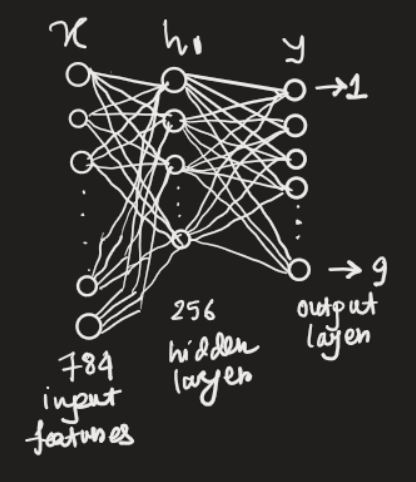
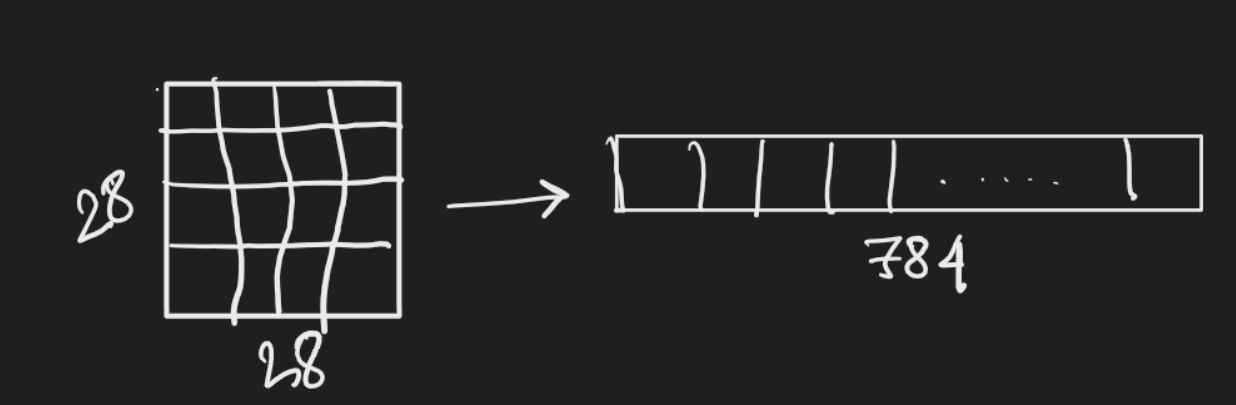

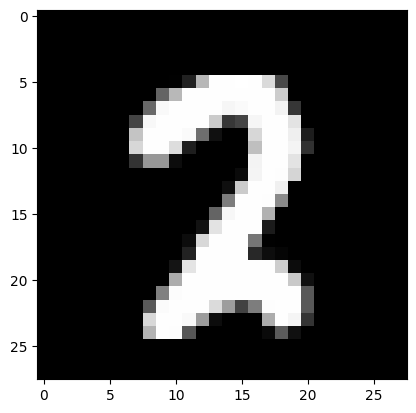

In [ ]:
# Checking an sample image , data
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [ ]:
# Step 4: Define Loss Function and Optimizer

criterion = nn.CrossEntropyLoss()  # Computes loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001




*   `CrossEntropyLoss` → Used for classification problems.
*   `Adam Optimizer` → Adjusts model weights to minimize loss.



CrossEntropyLoss is a commonly used loss function in machine learning, particularly for classification tasks. It measures the difference between two probability distributions: the true labels (actual class) and the predicted probabilities output by the model. The goal is to minimize this difference, thereby improving the accuracy of the model.

**Simple Explanation:**

CrossEntropyLoss: Measures how well the predicted probabilities match the actual class labels. Lower loss indicates better predictions.

**Example:**

Let's say we have a binary classification problem (two classes: 0 and 1).

**Actual Labels (True Distribution):**

* Class 0: 1.0

* Class 1: 0.0

**Predicted Probabilities (Predicted Distribution):**

* Class 0: 0.7

* Class 1: 0.3

Using CrossEntropyLoss, we can calculate the loss for this prediction.

Calculation:

For binary classification, CrossEntropyLoss can be calculated using the following formula:

$Loss = −[𝑦log(𝑝)+(1−𝑦)log(1−𝑝)]$

Where:

* 𝑦 is the true label

* 𝑝 is the predicted probability for the true class

For Class 0:

$\text{Loss}_0 = -\left[ 1 \log(0.7) + 0 \log(1 - 0.7) \right] = -\log(0.7) \approx 0.356$

For Class 1:

$\text{Loss}_1 = -\left[ 0 \log(0.3) + 1 \log(1 - 0.3) \right] = -\log(0.7) \approx 0.356$


In [ ]:
# Step 5: Train the Neural Network

num_epochs = 5  # Number of times the model sees the entire dataset

for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 0.1712
Epoch [2/5], Loss: 0.0797
Epoch [3/5], Loss: 0.1485
Epoch [4/5], Loss: 0.1141
Epoch [5/5], Loss: 0.0966


* `zero_grad()` → Clears accumulated gradients.
* `model(images)` → Feeds images through the network.
* `loss.backward()` → Computes gradients for weight updates.
* `ptimizer.step()` → Adjusts weights to reduce loss.

In [ ]:
# Step 6: Evaluate the Model

correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 96.19%


* `torch.no_grad()` → No need to calculate gradients during testing.
* `torch.max(outputs, 1)` → Returns predicted class with highest probability.
Calculates accuracy based on correct predictions.


The loss decreases as the model learns.

The accuracy improves (usually above 90% for a simple model).